In [1]:
from datetime import datetime
import json
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import pandas as pd
import plotly.express as px
import seaborn as sns

df = pd.read_json('../artifacts/aggregate.json')

with open('../datasets/geography.json', 'r') as f:
    region_definitions = json.load(f)

regions, state_regions = itemgetter('regions', 'state_regions')(region_definitions)

df

state  bill_id status_date  legiscan_bill_id      status  \
0      US   HB1112  2023-02-21           1717626  Introduced   
1      OK    SB937  2023-02-06           1669660  Introduced   
2      KS    SB233  2023-03-01           1704027   Engrossed   
3      MI   HB4075  2023-02-07           1697993  Introduced   
4      SC    H3801  2023-01-25           1679817  Introduced   
..    ...      ...         ...               ...         ...   
483    SC    S0276  2023-01-10           1637159  Introduced   
484    IA  SSB1197  2023-02-27           1721782  Introduced   
485    HI    HB508  2023-01-23           1673977  Introduced   
486    NM    HB394  2023-02-13           1705756  Introduced   
487    MS   HB1127  2023-01-31           1668816      Failed   

                                              sponsors  \
0    [Jim Banks, Mary Miller, Lauren Boebert, Ryan ...   
1                                         [Shane Jett]   
2                          [Federal and State Affairs]   
3                                        [Andrew Fink]   
4    [John Mccravy, James Burns, Roger Nutt, Travis...   
..                                                 ...   
483                                     [Danny Verdin]   
484                        [Health And Human Services]   
485                                   [Diamond Garcia]   
486          [John Block, Rodney Montoya, Mark Duncan]   
487  [Becky Currie, William Arnold, Randy Boyd, Bil...   

                                                 title  \
0              Ensuring Military Readiness Act of 2023   
1    Schools; creating the School Establishment Cla...   
2    Creating a civil cause of action against a phy...   
3    Civil rights: religious discrimination; Michig...   
4              Adoption and Foster Care Protection Act   
..                                                 ...   
483            Biological Sex Constitutional Amendment   
484  A bill for an act relating to prohibited activ...   
485   Relating To Sex-specific Student Athletic Teams.   
486         No Gender Reassignment Teaching In Schools   
487  MS Safe Adolescents from Experimentation (SAFE...   

                                           description     doc_id  \
0    To provide requirements related to the eligibi...  2742708.0   
1    Schools; creating the School Establishment Cla...  2651535.0   
2    Creating a civil cause of action against a phy...  2693547.0   
3    Civil rights: religious discrimination; Michig...  2685329.0   
4    Amend The South Carolina Code Of Laws By Enact...  2662581.0   
..                                                 ...        ...   
483  An Amendment To Article Xvii Of The Constituti...  2616773.0   
484  A bill for an act relating to prohibited activ...  2719395.0   
485  Creates the requirement of school sports to de...  2656302.0   
486         No Gender Reassignment Teaching In Schools  2696257.0   
487  An Act To Be Known As The Mississippi Save Ado...  2650660.0   

    introduced_date  
0        2023-02-21  
1        2023-02-06  
2        2023-02-10  
3        2023-02-07  
4        2023-01-25  
..              ...  
483      2022-12-07  
484      2023-02-27  
485      2023-01-20  
486      2023-02-13  
487      2023-01-16  

[488 rows x 10 columns]

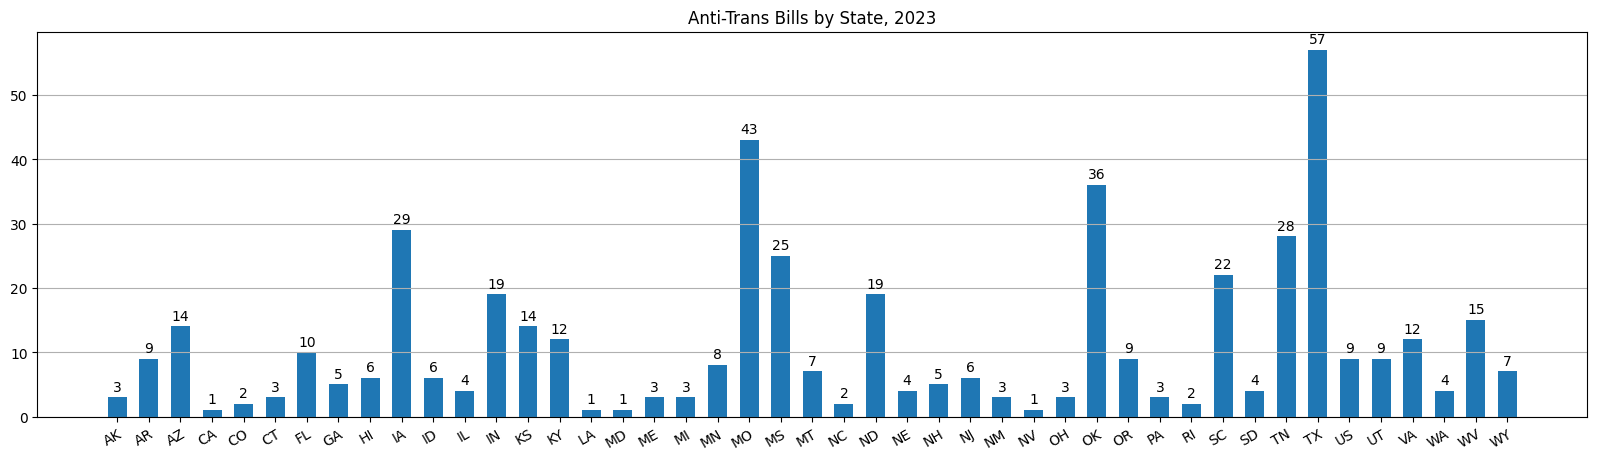

In [2]:
data = df['state'].value_counts().sort_index()

y_pos = np.arange(len(data))
plt.figure(figsize=(20,5))
plt.xticks(y_pos, data.index, rotation=30, ha="right", rotation_mode="anchor")
plt.grid(True, which='major', axis='y')
plt.bar(y_pos, data, align='center', width=0.6)
for i in range(len(data)):
    plt.text(i,data.iloc[i] + 1,data.iloc[i], ha='center')
plt.title('Anti-Trans Bills by State, 2023')
plt.show()

In [3]:
# oh shit there are feds involved too

df.loc[df.state == 'US']

state bill_id status_date  legiscan_bill_id      status  \
0      US  HB1112  2023-02-21           1717626  Introduced   
23     US   SB187  2023-01-31           1689600  Introduced   
46     US   HB429  2023-01-20           1674808  Introduced   
134    US   HR115  2023-02-09           1702925  Introduced   
158    US   SB457  2023-02-15           1710145  Introduced   
343    US   SB435  2023-02-15           1710431  Introduced   
349    US  HB1064  2023-02-17           1714858  Introduced   
402    US    SR53  2023-02-09           1703088  Introduced   
432    US   HB216  2023-01-09           1650772  Introduced   

                                              sponsors  \
0    [Jim Banks, Mary Miller, Lauren Boebert, Ryan ...   
23                         [Marco Rubio, Steve Daines]   
46   [Brian Mast, Dan Bishop, Jeff Duncan, Paul Gos...   
134  [Debbie Lesko, Diana Harshbarger, Mary Miller,...   
158                                      [Josh Hawley]   
343  [Marco Rubio, Marsha Blackburn, Ted Budd, Tomm...   
349                                        [Jim Banks]   
402  [Cindy Hyde-Smith, Marco Rubio, Ted Cruz, Cynt...   
432                                    [Jeff Van Drew]   

                                                 title  \
0              Ensuring Military Readiness Act of 2023   
23   No Tax Breaks for Radical Corporate Activism A...   
46    No Tax Breaks for Radical Corporate Activism Act   
134  Establishing a Women's Bill of Rights to reaff...   
158           Protecting Our Kids from Child Abuse Act   
343            Ensuring Military Readiness Act of 2023   
349            Ensuring Military Readiness Act of 2023   
402  A resolution establishing a Women's Bill of Ri...   
432                    My Child, My Choice Act of 2023   

                                           description     doc_id  \
0    To provide requirements related to the eligibi...  2742708.0   
23   A bill to amend the Internal Revenue Code of 1...  2696929.0   
46   To amend the Internal Revenue Code of 1986 to ...  2674746.0   
134  Establishing a Women's Bill of Rights to reaff...  2692544.0   
158  A bill to establish a Federal tort against ped...  2734132.0   
343  A bill to provide requirements related to the ...  2727671.0   
349  To provide requirements related to the eligibi...  2737306.0   
402  A resolution establishing a Women's Bill of Ri...  2696872.0   
432  To prohibit Federal education funds from being...  2654610.0   

    introduced_date  
0        2023-02-21  
23       2023-01-31  
46       2023-01-20  
134      2023-02-09  
158      2023-02-15  
343      2023-02-15  
349      2023-02-17  
402      2023-02-09  
432      2023-01-09

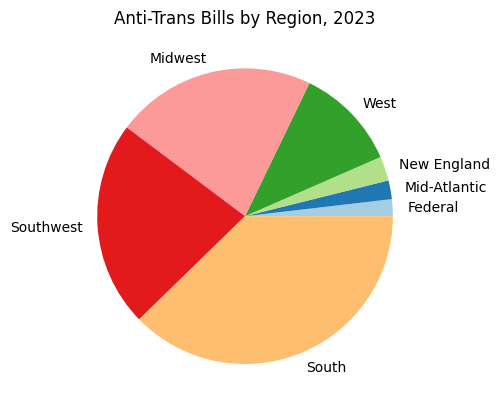

In [4]:
data = df.copy()['state'].transform(lambda x: state_regions[x]).value_counts().sort_values()

colors = sns.color_palette('Paired')
plt.pie(data, labels=data.index, colors=colors)
plt.title('Anti-Trans Bills by Region, 2023')
plt.show()

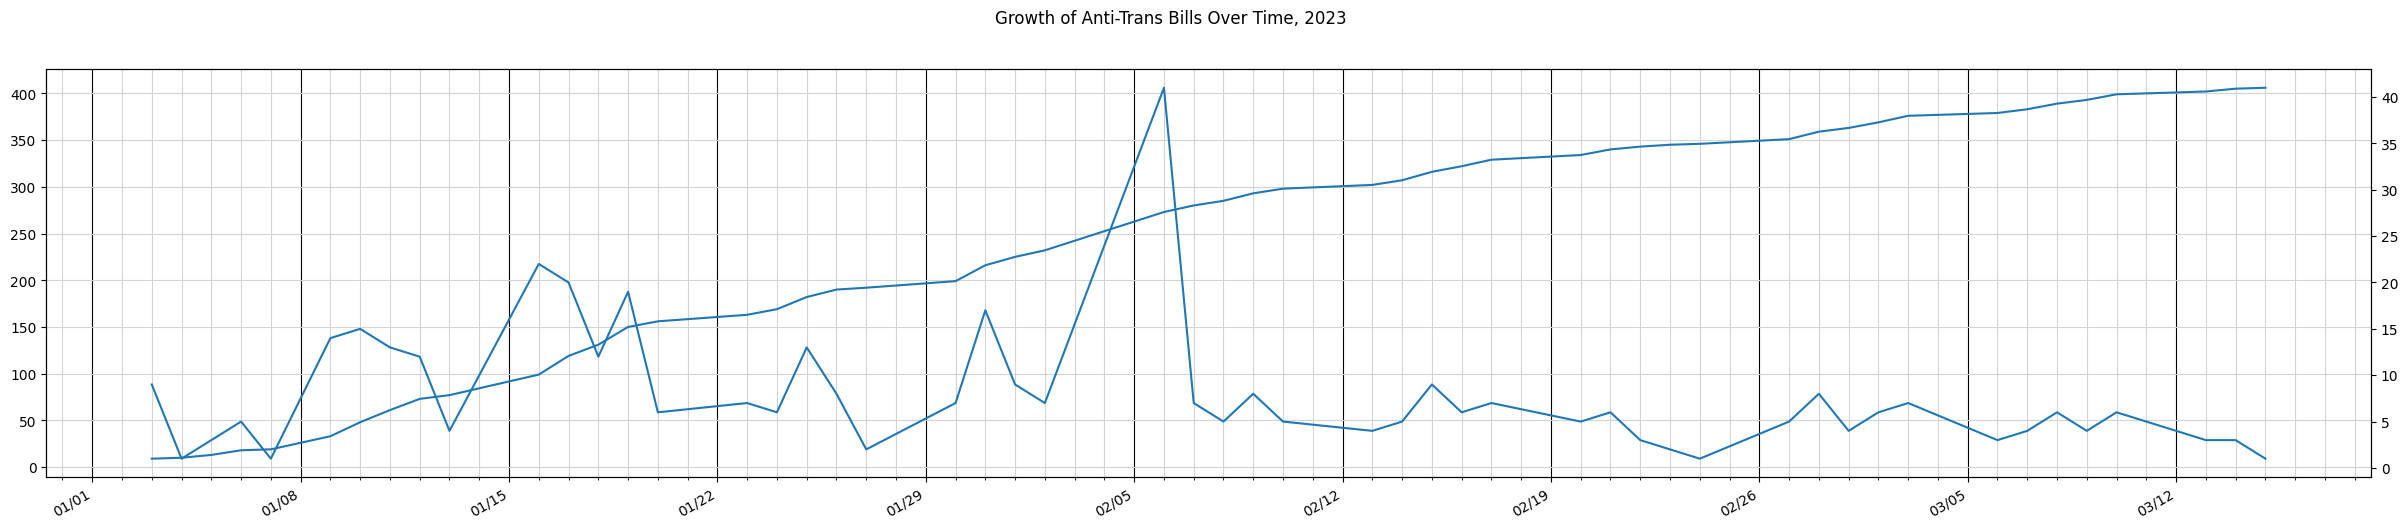

In [5]:
data = (
    df
        .loc[df.introduced_date != '']
        .loc[df.introduced_date >= '2022/11/01']
        .copy()
        ['introduced_date'].transform(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
        .value_counts()
        .sort_index()
)

data2 = data.cumsum()

fig, ax = plt.subplots(1, 1, figsize=(30, 6))
fig.suptitle('Growth of Anti-Trans Bills Over Time, 2023')

week_locator = mdates.WeekdayLocator(byweekday=6,interval=1)
day_locator = mdates.DayLocator(interval=1)
week_formatter = mdates.DateFormatter("%m/%d")
day_formatter = mdates.DateFormatter("%a")
ax.xaxis.set_major_locator(week_locator)
ax.xaxis.set_minor_locator(day_locator)
ax.xaxis.set_major_formatter(week_formatter)
ax.grid(True, which='major', axis='x', color='black')
ax.grid(True, which='minor', axis='x', color='lightgray')
ax.grid(True, which='major', axis='y', color='lightgray')
ax2=ax.twinx()
ax2.plot(data)
ax.plot(data2)
fig.autofmt_xdate(rotation=30)

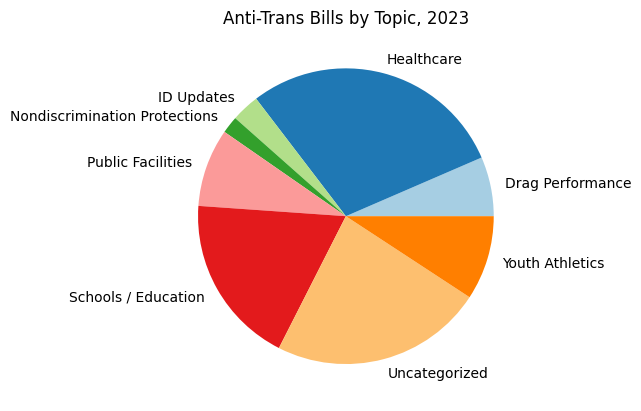

In [6]:
from pprint import pprint
with open('../artifacts/categorized.json', 'r') as f:
    categorized = json.load(f)
    
categorized_series = pd.DataFrame.from_dict(
    data={
        k: len(v)
        for k, v
        in categorized.items()
        if len(v) > 0
    },
    orient='index',
    columns=['ct'],
)['ct'].sort_index()

colors = sns.color_palette('Paired')
plt.pie(categorized_series, labels=categorized_series.index, colors=colors)
plt.title('Anti-Trans Bills by Topic, 2023')
plt.show()

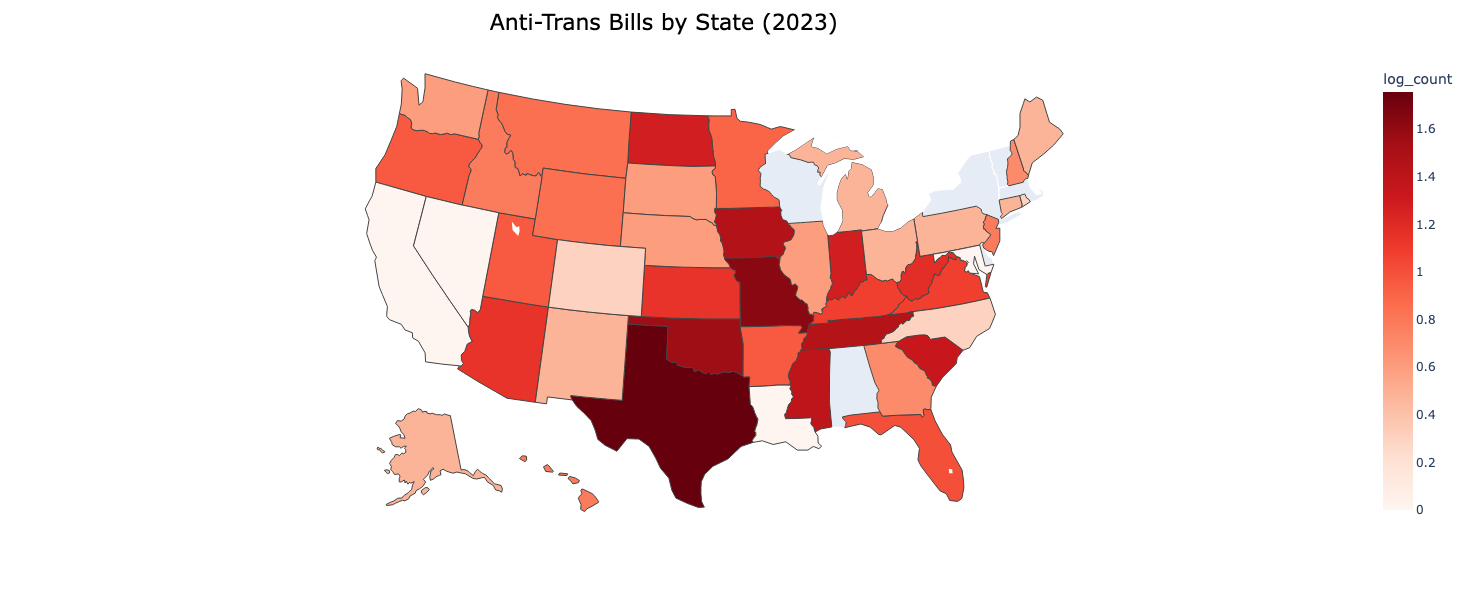

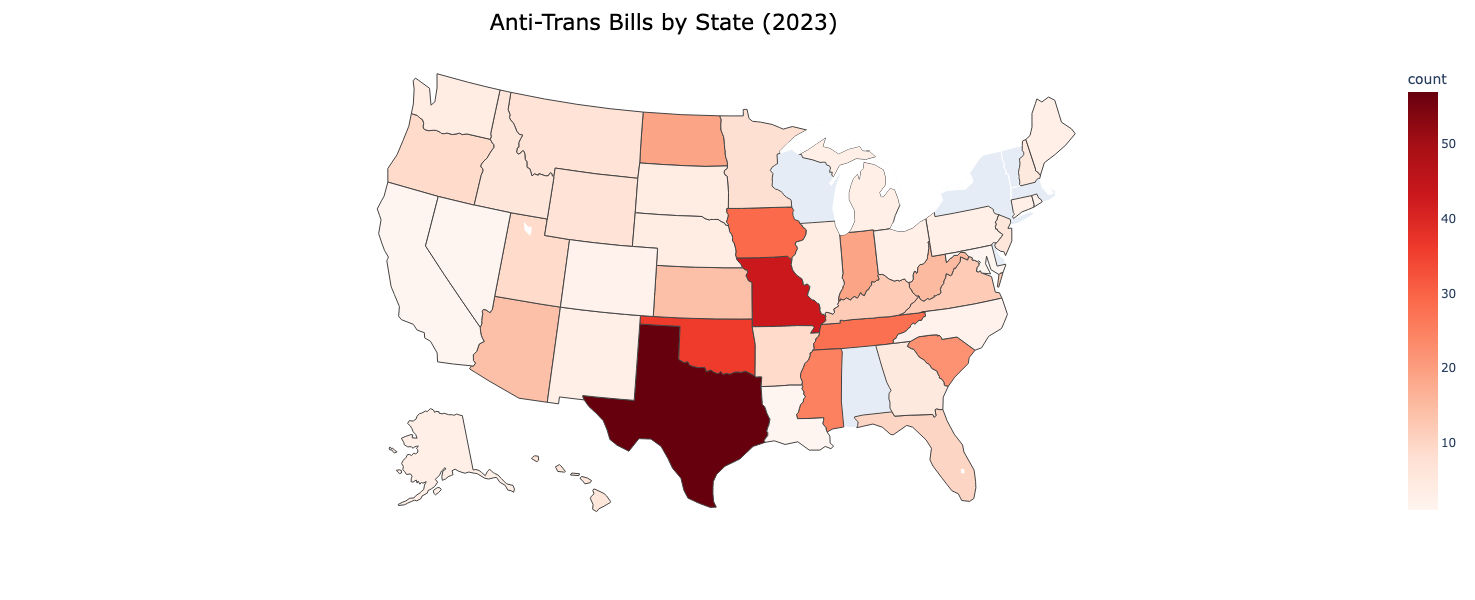

In [7]:
data = (
    df
        .copy()
        ['state']
        .value_counts()
        .to_frame()
        .assign(log_count=lambda r: np.log10(r.state))
        .rename(columns={'state':'count'})
        .rename_axis('state')
        .reset_index()
)

fig1 = px.choropleth(
    data,
    locations='state',
    locationmode='USA-states',
    scope='usa',
    color='log_count',
    color_continuous_scale='reds',
)

fig1.update_layout(
    height=600,
    width=1000,
    title_text = 'Anti-Trans Bills by State (2023)',
    title_font_size = 22,
    title_font_color="black", 
    title_x=0.45, 
)

fig1.show()


fig2 = px.choropleth(
    data,
    locations='state',
    locationmode='USA-states',
    scope='usa',
    color='count',
    color_continuous_scale='reds',
)

fig2.update_layout(
    height=600,
    width=1000,
    title_text = 'Anti-Trans Bills by State (2023)',
    title_font_size = 22,
    title_font_color="black", 
    title_x=0.45, 
)

fig2.show()
